In [141]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [142]:
data_dir = 'G:/TuBes MLDL/Dataset MLDL Hewan'

In [143]:
data = tf.keras.utils.image_dataset_from_directory(data_dir, image_size=(300, 300), batch_size = 8)
print(data.class_names)
class_names = data.class_names

Found 300 files belonging to 3 classes.
['Aves', 'Mamalia', 'Reptil']


In [144]:
data_iterator = data.as_numpy_iterator()
print("data_iterator", data_iterator)

data_iterator NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x00000161066C98D0>)


In [145]:
batch = data_iterator.next()
print("batch", batch)

batch (array([[[[ 13.      ,  13.      ,  13.      ],
         [ 13.      ,  13.      ,  13.      ],
         [ 13.      ,  13.      ,  13.      ],
         ...,
         [ 11.      ,  14.      ,  14.      ],
         [ 10.      ,  14.      ,  15.      ],
         [ 10.      ,  14.      ,  15.      ]],

        [[ 13.      ,  13.      ,  13.      ],
         [ 13.      ,  13.      ,  13.      ],
         [ 13.      ,  13.      ,  13.      ],
         ...,
         [ 11.      ,  14.      ,  14.      ],
         [ 10.      ,  14.      ,  15.      ],
         [ 10.      ,  14.      ,  15.      ]],

        [[ 13.      ,  13.      ,  13.      ],
         [ 13.      ,  13.      ,  13.      ],
         [ 13.      ,  13.      ,  13.      ],
         ...,
         [ 11.      ,  14.      ,  14.      ],
         [ 10.      ,  14.      ,  15.      ],
         [ 10.      ,  14.      ,  15.      ]],

        ...,

        [[ 13.      ,  13.      ,  13.      ],
         [ 13.      ,  13.      ,  13.

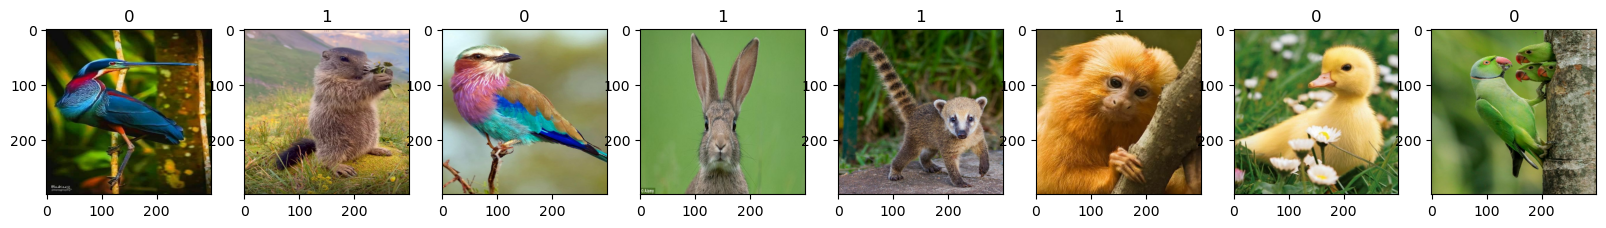

In [146]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [147]:
data = data.map(lambda x, y: (x/255.0, y))
print("Tipe data setelah normalisasi: {}".format(data.element_spec))
print("Bentuk data setelah normalisasi : {}".format(data.element_spec))
print("Jumlah data", len(data))

Tipe data setelah normalisasi: (TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Bentuk data setelah normalisasi : (TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Jumlah data 38


In [148]:
train_size = int(len(data) * 0.8)
val_size = int(len(data) * 0.1)
test_size = int(len(data) * 0.1)

print(train_size)
print(val_size)
print(test_size)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

30
3
3


In [149]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = Sequential()

model.add(Conv2D(filters=256, kernel_size=(11, 11), strides=(4,4), activation='relu', input_shape=(300, 300, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(filters=512, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [150]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(learning_rate=0.001),  metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 73, 73, 256)    │        93,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 73, 73, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 36, 36, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 36, 36, 512)    │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 36, 36, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 12, 12, 512)    │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 12, 12, 512)    │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4096)           │    75,501,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 3)              │        12,291 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,560,003 (375.98 MB)

 Trainable params: 98,555,395 (375.96 MB)

 Non-trainable params: 4,608 (18.00 KB)

In [151]:
history = model.fit(train, epochs=50, validation_data=val)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.3663 - loss: 2.6333 - val_accuracy: 0.2917 - val_loss: 1.1148
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.4918 - loss: 1.8195 - val_accuracy: 0.4167 - val_loss: 1.0817
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.4327 - loss: 1.8709 - val_accuracy: 0.3333 - val_loss: 1.0829
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.5508 - loss: 1.4494 - val_accuracy: 0.3750 - val_loss: 1.0746
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.6043 - loss: 1.4446 - val_accuracy: 0.4583 - val_loss: 1.0448
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.6356 - loss: 1.1108 - val_accuracy: 0.5833 - val_loss: 0.9459
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.6757 - loss: 0.9767 - val_accuracy: 0.3333 - val_loss: 1.0786
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.6079 - loss: 1.0950 - val_accuracy: 0.5833 - val_loss:

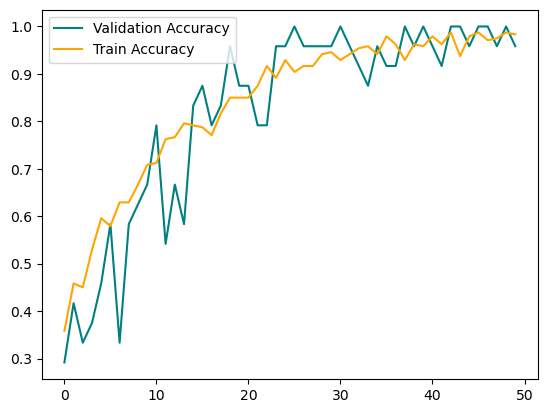

In [152]:
fig = plt.figure()
plt.plot(history.history['val_accuracy'], color='teal', label='Validation Accuracy')
plt.plot(history.history['accuracy'], color='orange', label = 'Train Accuracy')
plt.legend(loc="upper left")
plt.show()

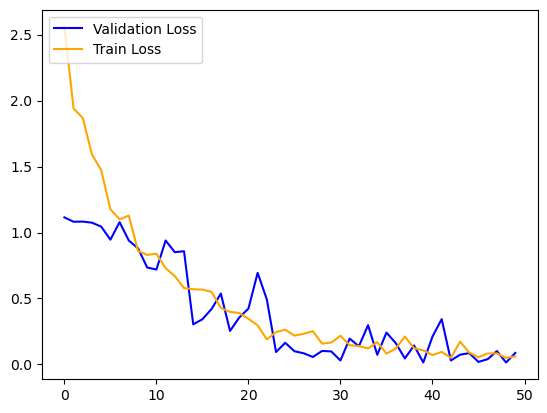

In [153]:
fig = plt.figure()
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')
plt.plot(history.history['loss'], color='orange', label = 'Train Loss')
plt.legend(loc="upper left")
plt.show()

In [154]:
model.evaluate(test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 423ms/step - accuracy: 0.9792 - loss: 0.0636


[0.11981173604726791, 0.9583333134651184]

In [155]:
model.save('G:/TuBes MLDL/model_hewan_VGGNett.h5')

In [156]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
model = tf.keras.models.load_model('G:/TuBes MLDL/model_hewan_VGGNett.h5')

(1, 300, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
[[0.12937579 0.78530014 0.08532409]]
1
Accuracy :  78.53001356124878
Mamalia


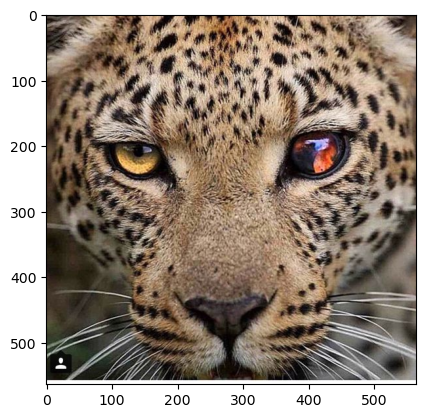

In [157]:
mamalia = cv2.imread('G:/TuBes MLDL/Test/Mamalia/101.jpg')
mamalia = cv2.cvtColor(mamalia, cv2.COLOR_BGR2RGB)
plt.imshow(mamalia)
mamalia = cv2.resize(mamalia, (300, 300))
mamalia = mamalia / 255.0
mamalia = np.expand_dims(mamalia, axis = 0)
print(mamalia.shape)

pred = model.predict(mamalia)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 300, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
[[9.6105105e-01 3.8377643e-02 5.7134981e-04]]
0
Accuracy :  96.10510468482971
Aves


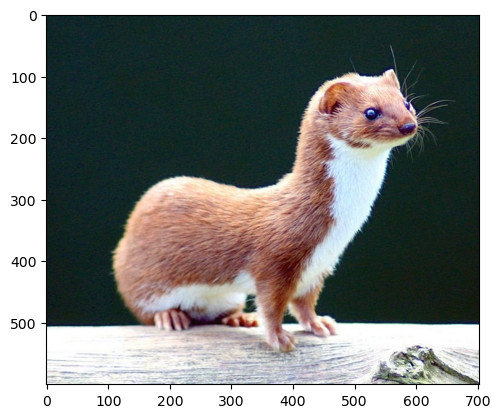

In [158]:
mamalia = cv2.imread('G:/TuBes MLDL/Test/Mamalia/102.jpg')
mamalia = cv2.cvtColor(mamalia, cv2.COLOR_BGR2RGB)
plt.imshow(mamalia)
mamalia = cv2.resize(mamalia, (300, 300))
mamalia = mamalia / 255.0
mamalia = np.expand_dims(mamalia, axis = 0)
print(mamalia.shape)

pred = model.predict(mamalia)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 300, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
[[0.12487856 0.83627135 0.0388501 ]]
1
Accuracy :  83.6271345615387
Mamalia


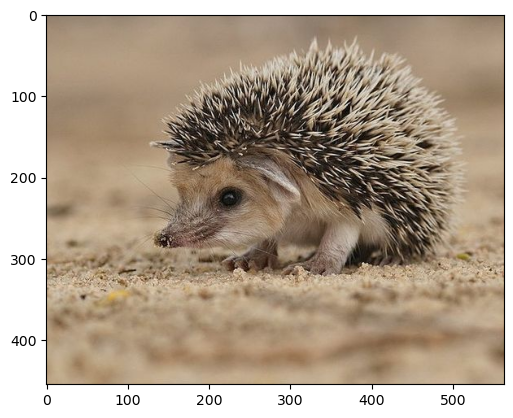

In [159]:
mamalia = cv2.imread('G:/TuBes MLDL/Test/Mamalia/103.jpg')
mamalia = cv2.cvtColor(mamalia, cv2.COLOR_BGR2RGB)
plt.imshow(mamalia)
mamalia = cv2.resize(mamalia, (300, 300))
mamalia = mamalia / 255.0
mamalia = np.expand_dims(mamalia, axis = 0)
print(mamalia.shape)

pred = model.predict(mamalia)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 300, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
[[0.06127757 0.9139355  0.02478691]]
1
Accuracy :  91.39354825019836
Mamalia


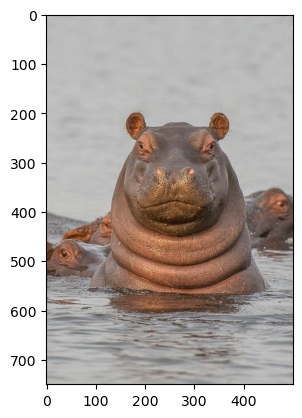

In [160]:
mamalia = cv2.imread('G:/TuBes MLDL/Test/Mamalia/104.jpg')
mamalia = cv2.cvtColor(mamalia, cv2.COLOR_BGR2RGB)
plt.imshow(mamalia)
mamalia = cv2.resize(mamalia, (300, 300))
mamalia = mamalia / 255.0
mamalia = np.expand_dims(mamalia, axis = 0)
print(mamalia.shape)

pred = model.predict(mamalia)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 300, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
[[0.03624276 0.793076   0.17068128]]
1
Accuracy :  79.30759787559509
Mamalia


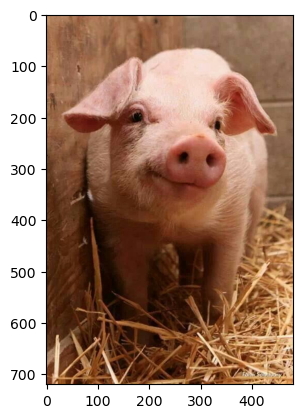

In [161]:
mamalia = cv2.imread('G:/TuBes MLDL/Test/Mamalia/105.jpg')
mamalia = cv2.cvtColor(mamalia, cv2.COLOR_BGR2RGB)
plt.imshow(mamalia)
mamalia = cv2.resize(mamalia, (300, 300))
mamalia = mamalia / 255.0
mamalia = np.expand_dims(mamalia, axis = 0)
print(mamalia.shape)

pred = model.predict(mamalia)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 300, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
[[0.00338963 0.90391445 0.09269589]]
1
Accuracy :  90.39144515991211
Mamalia


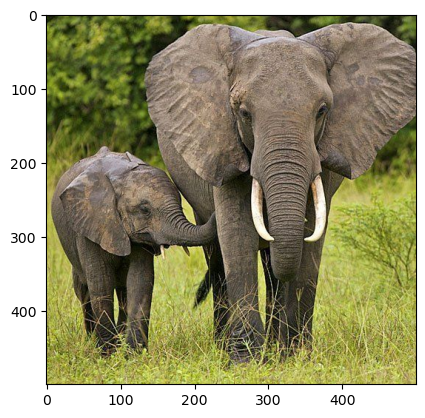

In [162]:
mamalia = cv2.imread('G:/TuBes MLDL/Test/Mamalia/106.jpg')
mamalia = cv2.cvtColor(mamalia, cv2.COLOR_BGR2RGB)
plt.imshow(mamalia)
mamalia = cv2.resize(mamalia, (300, 300))
mamalia = mamalia / 255.0
mamalia = np.expand_dims(mamalia, axis = 0)
print(mamalia.shape)

pred = model.predict(mamalia)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 300, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
[[0.02980474 0.9672608  0.00293445]]
1
Accuracy :  96.72607779502869
Mamalia


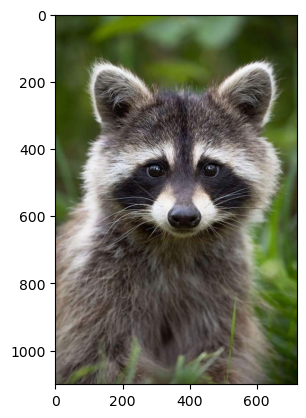

In [163]:
mamalia = cv2.imread('G:/TuBes MLDL/Test/Mamalia/107.jpg')
mamalia = cv2.cvtColor(mamalia, cv2.COLOR_BGR2RGB)
plt.imshow(mamalia)
mamalia = cv2.resize(mamalia, (300, 300))
mamalia = mamalia / 255.0
mamalia = np.expand_dims(mamalia, axis = 0)
print(mamalia.shape)

pred = model.predict(mamalia)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 300, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
[[0.2512572  0.74225646 0.0064863 ]]
1
Accuracy :  74.22564625740051
Mamalia


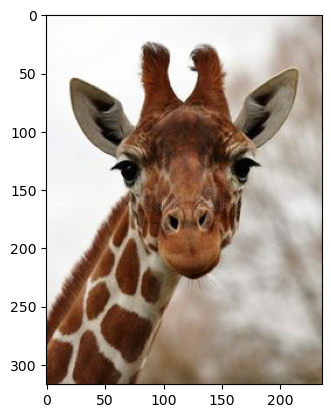

In [164]:
mamalia = cv2.imread('G:/TuBes MLDL/Test/Mamalia/108.jpg')
mamalia = cv2.cvtColor(mamalia, cv2.COLOR_BGR2RGB)
plt.imshow(mamalia)
mamalia = cv2.resize(mamalia, (300, 300))
mamalia = mamalia / 255.0
mamalia = np.expand_dims(mamalia, axis = 0)
print(mamalia.shape)

pred = model.predict(mamalia)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 300, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
[[2.6791482e-04 9.9807417e-01 1.6578512e-03]]
1
Accuracy :  99.80741739273071
Mamalia


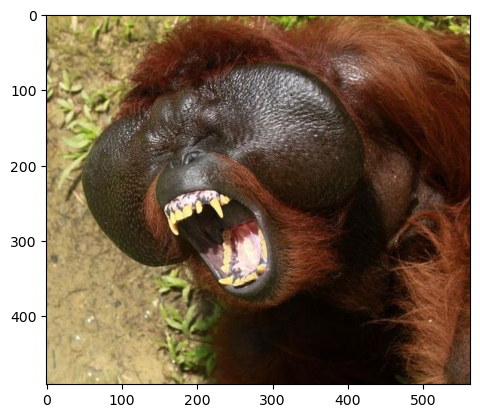

In [165]:
mamalia = cv2.imread('G:/TuBes MLDL/Test/Mamalia/109.jpg')
mamalia = cv2.cvtColor(mamalia, cv2.COLOR_BGR2RGB)
plt.imshow(mamalia)
mamalia = cv2.resize(mamalia, (300, 300))
mamalia = mamalia / 255.0
mamalia = np.expand_dims(mamalia, axis = 0)
print(mamalia.shape)

pred = model.predict(mamalia)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 300, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
[[0.24074304 0.6936145  0.06564251]]
1
Accuracy :  69.36144828796387
Mamalia


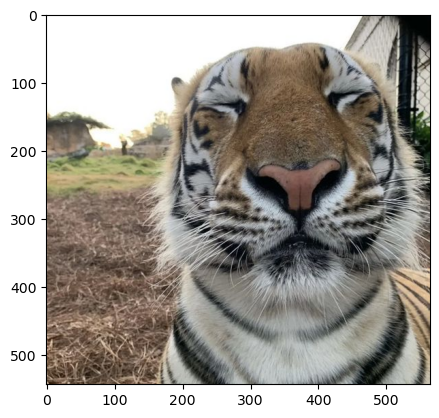

In [166]:
mamalia = cv2.imread('G:/TuBes MLDL/Test/Mamalia/110.jpg')
mamalia = cv2.cvtColor(mamalia, cv2.COLOR_BGR2RGB)
plt.imshow(mamalia)
mamalia = cv2.resize(mamalia, (300, 300))
mamalia = mamalia / 255.0
mamalia = np.expand_dims(mamalia, axis = 0)
print(mamalia.shape)

pred = model.predict(mamalia)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 300, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
[[9.9893075e-01 1.0689213e-03 3.2092925e-07]]
0
Accuracy :  99.89307522773743
Aves


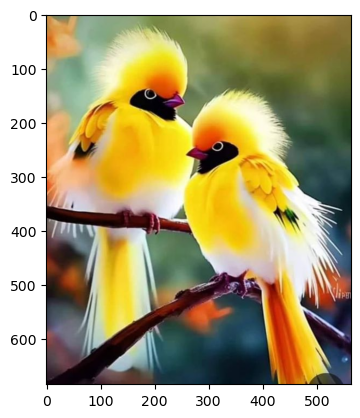

In [167]:
aves = cv2.imread('G:/TuBes MLDL/Test/Aves/101.jpg')
aves = cv2.cvtColor(aves, cv2.COLOR_BGR2RGB)
plt.imshow(aves)
aves = cv2.resize(aves, (300, 300))
aves = aves / 255.0
aves = np.expand_dims(aves, axis = 0)
print(aves.shape)

pred = model.predict(aves)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 300, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
[[0.8254799  0.07058743 0.10393271]]
0
Accuracy :  82.54799246788025
Aves


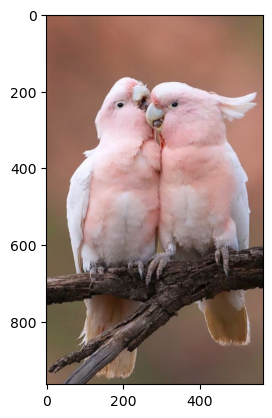

In [168]:
aves = cv2.imread('G:/TuBes MLDL/Test/Aves/102.jpg')
aves = cv2.cvtColor(aves, cv2.COLOR_BGR2RGB)
plt.imshow(aves)
aves = cv2.resize(aves, (300, 300))
aves = aves / 255.0
aves = np.expand_dims(aves, axis = 0)
print(aves.shape)

pred = model.predict(aves)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 300, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
[[2.1379371e-03 9.9720556e-01 6.5654173e-04]]
1
Accuracy :  99.72055554389954
Mamalia


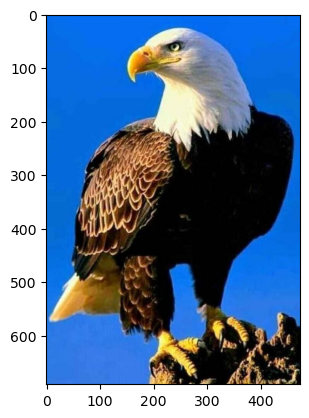

In [169]:
aves = cv2.imread('G:/TuBes MLDL/Test/Aves/103.jpg')
aves = cv2.cvtColor(aves, cv2.COLOR_BGR2RGB)
plt.imshow(aves)
aves = cv2.resize(aves, (300, 300))
aves = aves / 255.0
aves = np.expand_dims(aves, axis = 0)
print(aves.shape)

pred = model.predict(aves)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 300, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
[[0.26981094 0.60509515 0.12509389]]
1
Accuracy :  60.509514808654785
Mamalia


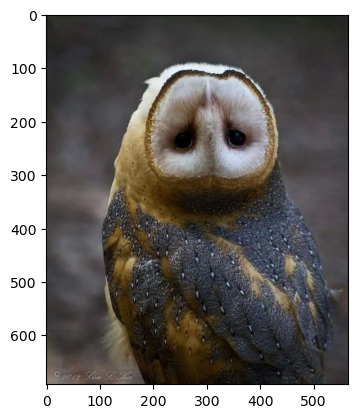

In [170]:
aves = cv2.imread('G:/TuBes MLDL/Test/Aves/104.jpg')
aves = cv2.cvtColor(aves, cv2.COLOR_BGR2RGB)
plt.imshow(aves)
aves = cv2.resize(aves, (300, 300))
aves = aves / 255.0
aves = np.expand_dims(aves, axis = 0)
print(aves.shape)

pred = model.predict(aves)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 300, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
[[0.79419744 0.20423378 0.00156881]]
0
Accuracy :  79.41974401473999
Aves


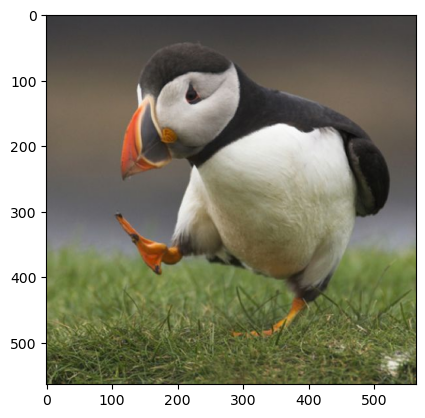

In [171]:
aves = cv2.imread('G:/TuBes MLDL/Test/Aves/105.jpg')
aves = cv2.cvtColor(aves, cv2.COLOR_BGR2RGB)
plt.imshow(aves)
aves = cv2.resize(aves, (300, 300))
aves = aves / 255.0
aves = np.expand_dims(aves, axis = 0)
print(aves.shape)

pred = model.predict(aves)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 300, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
[[9.8789668e-01 1.2100841e-02 2.4998897e-06]]
0
Accuracy :  98.78966808319092
Aves


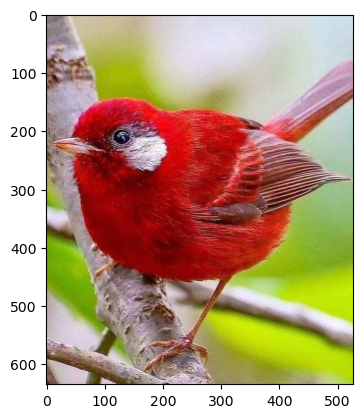

In [172]:
aves = cv2.imread('G:/TuBes MLDL/Test/Aves/106.jpg')
aves = cv2.cvtColor(aves, cv2.COLOR_BGR2RGB)
plt.imshow(aves)
aves = cv2.resize(aves, (300, 300))
aves = aves / 255.0
aves = np.expand_dims(aves, axis = 0)
print(aves.shape)

pred = model.predict(aves)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 300, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
[[0.98073626 0.00157241 0.01769134]]
0
Accuracy :  98.0736255645752
Aves


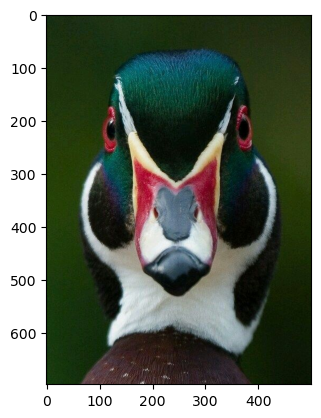

In [173]:
aves = cv2.imread('G:/TuBes MLDL/Test/Aves/107.jpg')
aves = cv2.cvtColor(aves, cv2.COLOR_BGR2RGB)
plt.imshow(aves)
aves = cv2.resize(aves, (300, 300))
aves = aves / 255.0
aves = np.expand_dims(aves, axis = 0)
print(aves.shape)

pred = model.predict(aves)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 300, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
[[0.97524714 0.01228438 0.01246851]]
0
Accuracy :  97.52471446990967
Aves


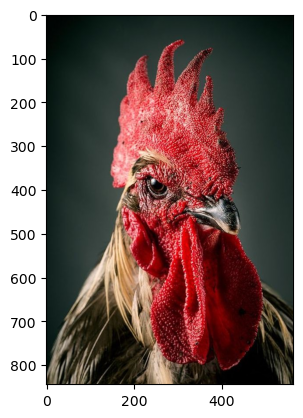

In [174]:
aves = cv2.imread('G:/TuBes MLDL/Test/Aves/108.jpg')
aves = cv2.cvtColor(aves, cv2.COLOR_BGR2RGB)
plt.imshow(aves)
aves = cv2.resize(aves, (300, 300))
aves = aves / 255.0
aves = np.expand_dims(aves, axis = 0)
print(aves.shape)

pred = model.predict(aves)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 300, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
[[0.80836296 0.17621322 0.01542378]]
0
Accuracy :  80.83629608154297
Aves


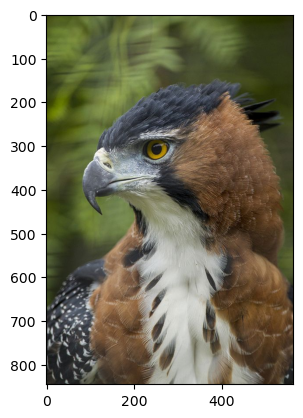

In [175]:
aves = cv2.imread('G:/TuBes MLDL/Test/Aves/109.jpg')
aves = cv2.cvtColor(aves, cv2.COLOR_BGR2RGB)
plt.imshow(aves)
aves = cv2.resize(aves, (300, 300))
aves = aves / 255.0
aves = np.expand_dims(aves, axis = 0)
print(aves.shape)

pred = model.predict(aves)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 300, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
[[9.995664e-01 4.238604e-04 9.733743e-06]]
0
Accuracy :  99.9566376209259
Aves


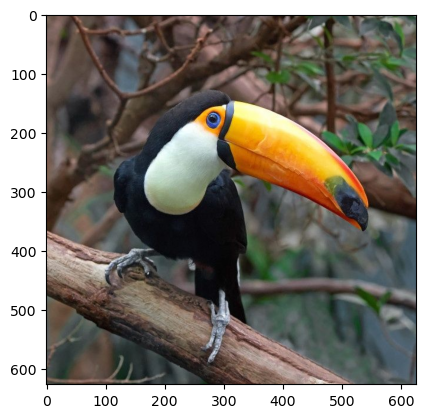

In [176]:
aves = cv2.imread('G:/TuBes MLDL/Test/Aves/110.jpg')
aves = cv2.cvtColor(aves, cv2.COLOR_BGR2RGB)
plt.imshow(aves)
aves = cv2.resize(aves, (300, 300))
aves = aves / 255.0
aves = np.expand_dims(aves, axis = 0)
print(aves.shape)

pred = model.predict(aves)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 300, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
[[1.1364265e-01 1.4082882e-04 8.8621646e-01]]
2
Accuracy :  88.62164616584778
Reptil


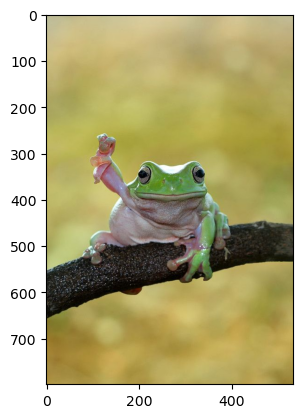

In [177]:
reptil = cv2.imread('G:/TuBes MLDL/Test/Reptil/101.jpg')
reptil = cv2.cvtColor(reptil, cv2.COLOR_BGR2RGB)
plt.imshow(reptil)
reptil = cv2.resize(reptil, (300, 300))
reptil = reptil / 255.0
reptil = np.expand_dims(reptil, axis = 0)
print(reptil.shape)

pred = model.predict(reptil)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 300, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
[[9.96736467e-01 1.04944134e-04 3.15857935e-03]]
0
Accuracy :  99.6736466884613
Aves


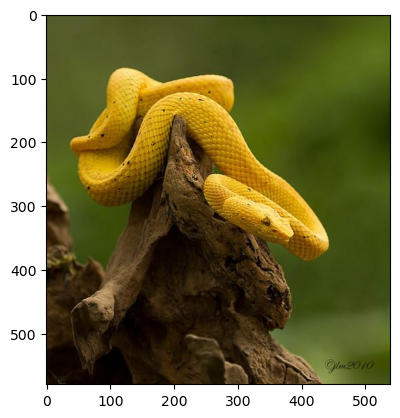

In [178]:
reptil = cv2.imread('G:/TuBes MLDL/Test/Reptil/102.jpg')
reptil = cv2.cvtColor(reptil, cv2.COLOR_BGR2RGB)
plt.imshow(reptil)
reptil = cv2.resize(reptil, (300, 300))
reptil = reptil / 255.0
reptil = np.expand_dims(reptil, axis = 0)
print(reptil.shape)

pred = model.predict(reptil)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 300, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
[[2.2052669e-04 9.1419082e-05 9.9968815e-01]]
2
Accuracy :  99.96881484985352
Reptil


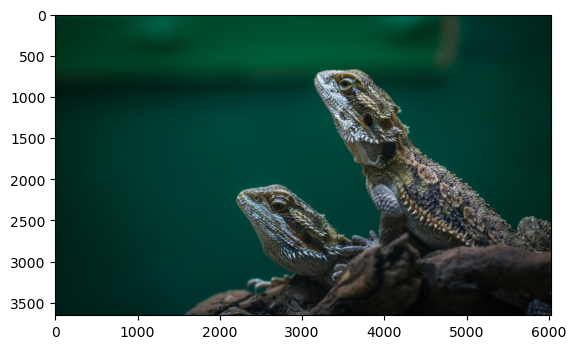

In [179]:
reptil = cv2.imread('G:/TuBes MLDL/Test/Reptil/103.jpg')
reptil = cv2.cvtColor(reptil, cv2.COLOR_BGR2RGB)
plt.imshow(reptil)
reptil = cv2.resize(reptil, (300, 300))
reptil = reptil / 255.0
reptil = np.expand_dims(reptil, axis = 0)
print(reptil.shape)

pred = model.predict(reptil)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 300, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
[[0.00375383 0.79648143 0.19976473]]
1
Accuracy :  79.64814305305481
Mamalia


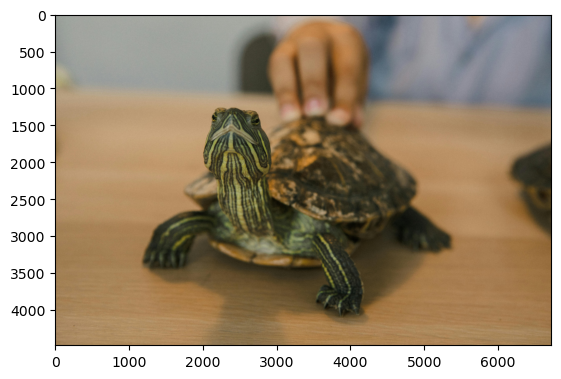

In [180]:
reptil = cv2.imread('G:/TuBes MLDL/Test/Reptil/104.jpg')
reptil = cv2.cvtColor(reptil, cv2.COLOR_BGR2RGB)
plt.imshow(reptil)
reptil = cv2.resize(reptil, (300, 300))
reptil = reptil / 255.0
reptil = np.expand_dims(reptil, axis = 0)
print(reptil.shape)

pred = model.predict(reptil)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 300, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
[[9.8669380e-01 6.4994168e-04 1.2656234e-02]]
0
Accuracy :  98.6693799495697
Aves


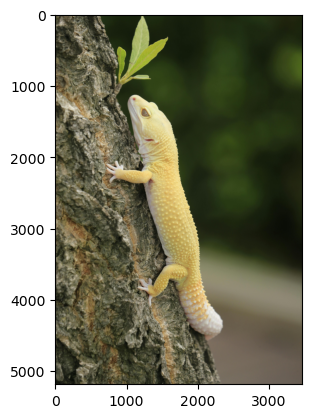

In [181]:
reptil = cv2.imread('G:/TuBes MLDL/Test/Reptil/105.jpg')
reptil = cv2.cvtColor(reptil, cv2.COLOR_BGR2RGB)
plt.imshow(reptil)
reptil = cv2.resize(reptil, (300, 300))
reptil = reptil / 255.0
reptil = np.expand_dims(reptil, axis = 0)
print(reptil.shape)

pred = model.predict(reptil)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 300, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
[[0.04842544 0.91784143 0.03373312]]
1
Accuracy :  91.78414344787598
Mamalia


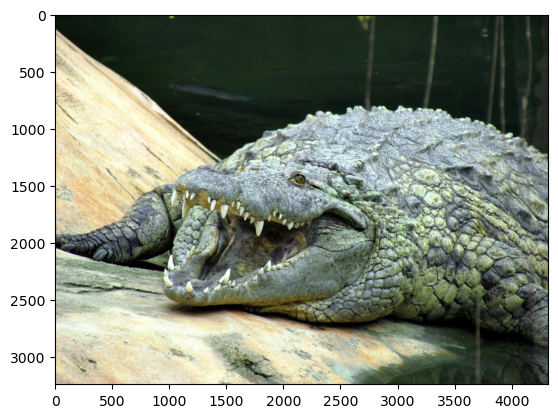

In [182]:
reptil = cv2.imread('G:/TuBes MLDL/Test/Reptil/106.jpg')
reptil = cv2.cvtColor(reptil, cv2.COLOR_BGR2RGB)
plt.imshow(reptil)
reptil = cv2.resize(reptil, (300, 300))
reptil = reptil / 255.0
reptil = np.expand_dims(reptil, axis = 0)
print(reptil.shape)

pred = model.predict(reptil)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 300, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
[[1.23964669e-03 1.13486685e-05 9.98749018e-01]]
2
Accuracy :  99.87490177154541
Reptil


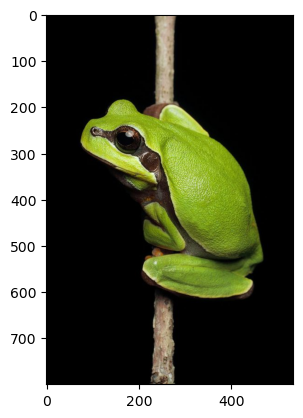

In [183]:
reptil = cv2.imread('G:/TuBes MLDL/Test/Reptil/107.jpg')
reptil = cv2.cvtColor(reptil, cv2.COLOR_BGR2RGB)
plt.imshow(reptil)
reptil = cv2.resize(reptil, (300, 300))
reptil = reptil / 255.0
reptil = np.expand_dims(reptil, axis = 0)
print(reptil.shape)

pred = model.predict(reptil)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 300, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
[[0.01380243 0.24833593 0.7378617 ]]
2
Accuracy :  73.7861692905426
Reptil


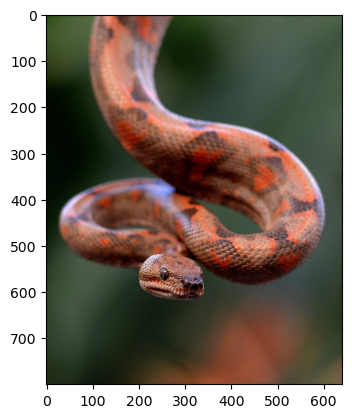

In [184]:
reptil = cv2.imread('G:/TuBes MLDL/Test/Reptil/108.jpg')
reptil = cv2.cvtColor(reptil, cv2.COLOR_BGR2RGB)
plt.imshow(reptil)
reptil = cv2.resize(reptil, (300, 300))
reptil = reptil / 255.0
reptil = np.expand_dims(reptil, axis = 0)
print(reptil.shape)

pred = model.predict(reptil)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 300, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
[[4.746015e-03 3.875229e-04 9.948664e-01]]
2
Accuracy :  99.48663711547852
Reptil


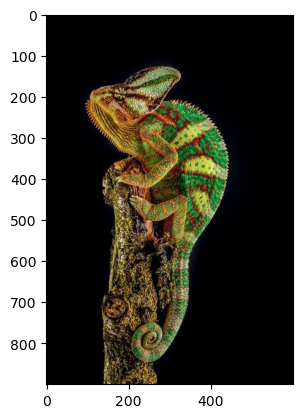

In [185]:
reptil = cv2.imread('G:/TuBes MLDL/Test/Reptil/109.jpg')
reptil = cv2.cvtColor(reptil, cv2.COLOR_BGR2RGB)
plt.imshow(reptil)
reptil = cv2.resize(reptil, (300, 300))
reptil = reptil / 255.0
reptil = np.expand_dims(reptil, axis = 0)
print(reptil.shape)

pred = model.predict(reptil)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])

(1, 300, 300, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
[[0.03688411 0.2789473  0.68416864]]
2
Accuracy :  68.41686367988586
Reptil


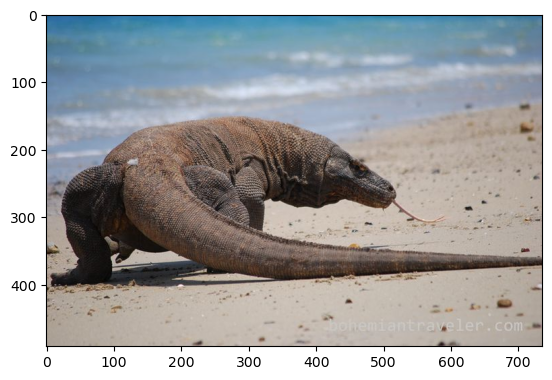

In [186]:
reptil = cv2.imread('G:/TuBes MLDL/Test/Reptil/110.jpg')
reptil = cv2.cvtColor(reptil, cv2.COLOR_BGR2RGB)
plt.imshow(reptil)
reptil = cv2.resize(reptil, (300, 300))
reptil = reptil / 255.0
reptil = np.expand_dims(reptil, axis = 0)
print(reptil.shape)

pred = model.predict(reptil)
print(pred)
print(np.argmax(pred))
print("Accuracy : ", pred[0][np.argmax(pred)] * 100)

class_names = ['Aves', 'Mamalia', 'Reptil']

print(class_names[np.argmax(pred)])